# Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)

Tarefa 3 de AEDI - (01/12/2024)

Nome: Giovanna Luiza Vales Correa

Matrícula: 242105852

### Questão

#### Você é um analista de dados imobiliários de uma empresa de consultoria especializada no mercado imobiliário. Esta empresa pede que você adquira os dados de um conjunto de propriedades de Ames, Iowa. Levando em consideração as características das propriedades (como o número de quartos, presença de garagem, lareira, piscina, entre outros), você deve desenvolver a seguinte análise estatística usando ANOVA:

#### a) Comparação de Preços entre Características:

Obtenção e Importação dos Dados

In [45]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\giova\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import kagglehub

# Download da versão mais recente
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import os
import shutil

# Caminho atual do dataset após o download
current_dir = path

# Novo caminho onde você quer mover os arquivos
new_dir = "datasets"

# Cria o novo diretório, se não existir
os.makedirs(new_dir, exist_ok=True)

# Move os arquivos para o novo diretório
for file_name in os.listdir(current_dir):
    full_file_path = os.path.join(current_dir, file_name)
    if os.path.isfile(full_file_path):
        shutil.move(full_file_path, new_dir)

print(f"Arquivos movidos para: {new_dir}")

Arquivos movidos para: datasets


Carregamento dos dados

In [73]:
import os
import pandas as pd

# Localiza o arquivo CSV principal
csv_file = os.path.join(new_dir, "AmesHousing.csv")

# Carrega o arquivo diretamente no Pandas
df = pd.read_csv(csv_file)

# Visualiza os primeiros registros do dataset
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [61]:
# Verificar as colunas disponíveis
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Características escolhidas: 
- Full Bath (banheiro completo)
- Garage Type (tipo de garagem)
- Neighborhood (bairro)
- Fireplaces (lareira)
- Pool QC (qualidade da pscina)

Tratando os dados para análise:

In [19]:
# Verificar valores NaN nas colunas
print(f"Valores ausentes em 'Full Bath': {df['Full Bath'].isnull().sum()}")
print(f"Valores ausentes em 'Garage Type': {df['Garage Type'].isnull().sum()}")
print(f"Valores ausentes em 'Fireplaces': {df['Fireplaces'].isnull().sum()}")
print(f"Valores ausentes em 'Pool QC': {df['Pool QC'].isnull().sum()}")
print(f"Valores ausentes em 'Neighborhood': {df['Neighborhood'].isnull().sum()}")

Valores ausentes em 'Full Bath': 0
Valores ausentes em 'Garage Type': 157
Valores ausentes em 'Fireplaces': 0
Valores ausentes em 'Pool QC': 2917
Valores ausentes em 'Neighborhood': 0


In [20]:
df['Garage Type'] = df['Garage Type'].fillna('None')
df['Pool QC'] = df['Pool QC'].fillna('None')

In [21]:
print(df['Garage Type'].isnull().sum())
print(df['Pool QC'].isnull().sum())

0
0


In [77]:
# Explorar as variáveis específicas
print(df['Full Bath'].value_counts())    # Quantidade de banheiros completos
print(df['Garage Type'].value_counts())    # Tipo de garagem
print(df['Fireplaces'].value_counts())    # Quantidade de Lareiras
print(df['Pool QC'].value_counts())        # Qualidade da piscina
print(df['Neighborhood'].value_counts())  # Bairro

Full Bath
2    1532
1    1318
3      64
0      12
4       4
Name: count, dtype: int64
Garage Type
Attchd     1731
Detchd      782
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64
Fireplaces
0    1422
1    1274
2     221
3      12
4       1
Name: count, dtype: int64
Pool QC
None    2917
Ex         4
Gd         4
TA         3
Fa         2
Name: count, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


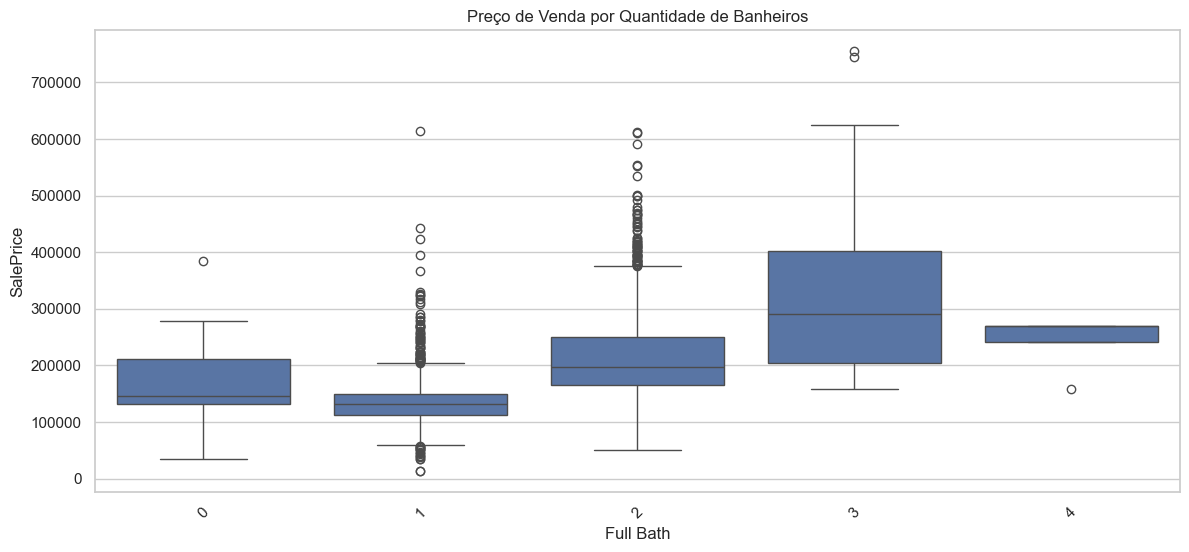

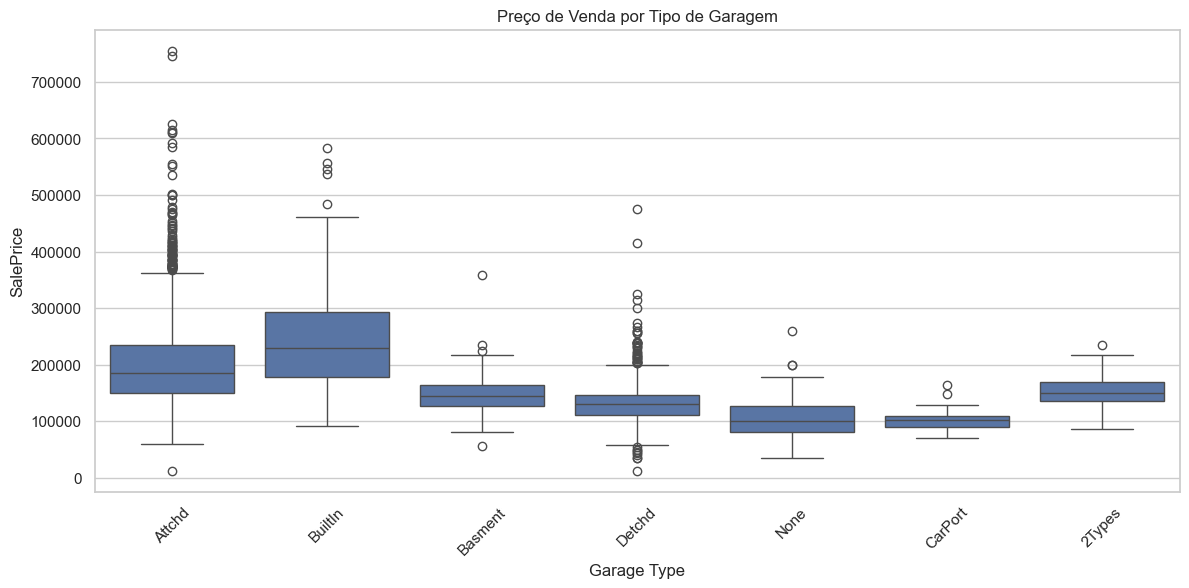

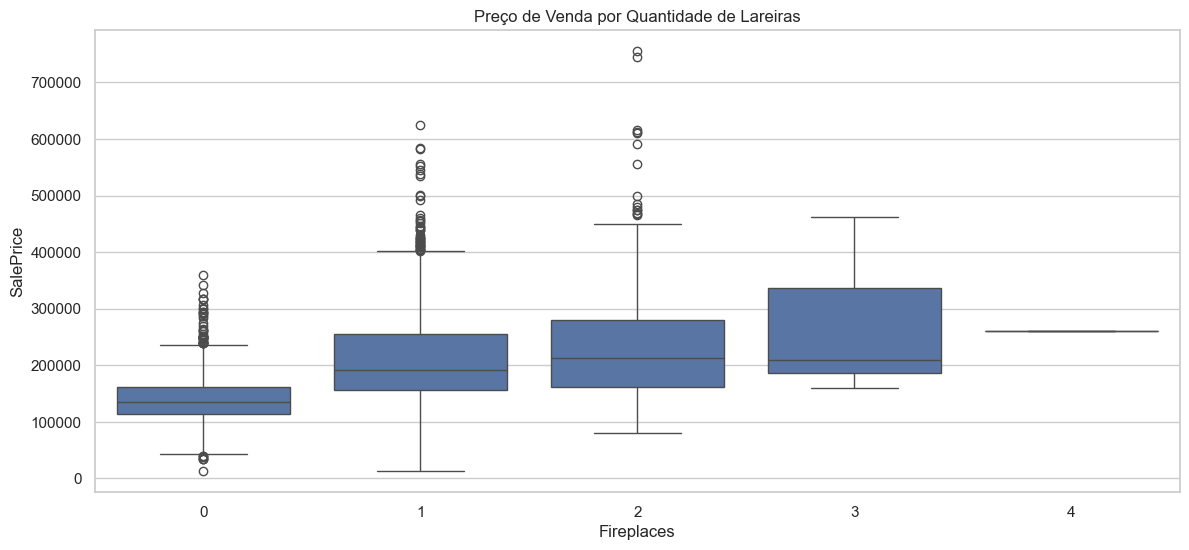

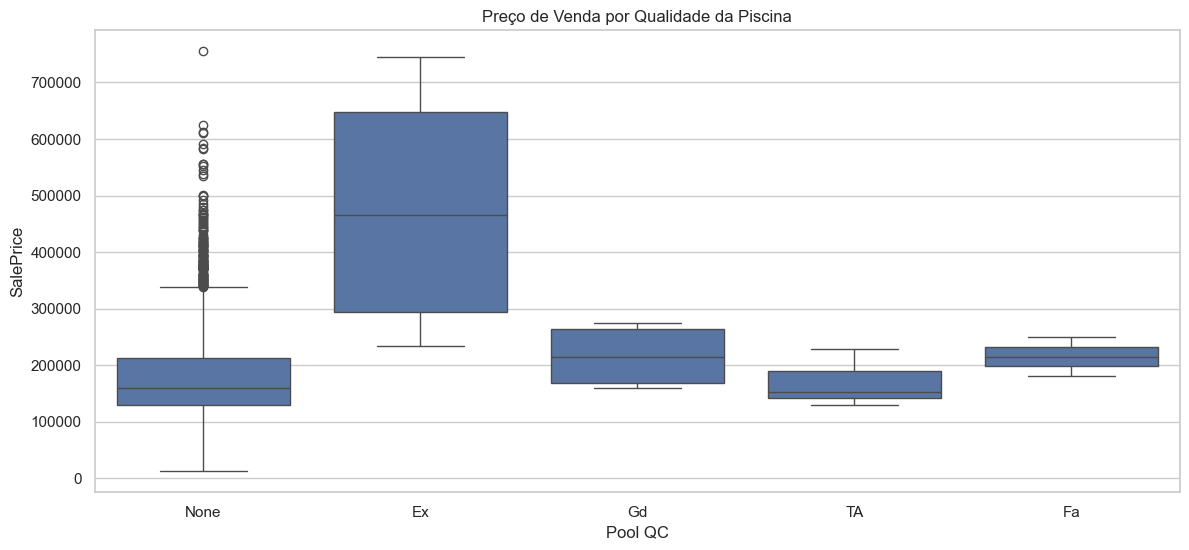

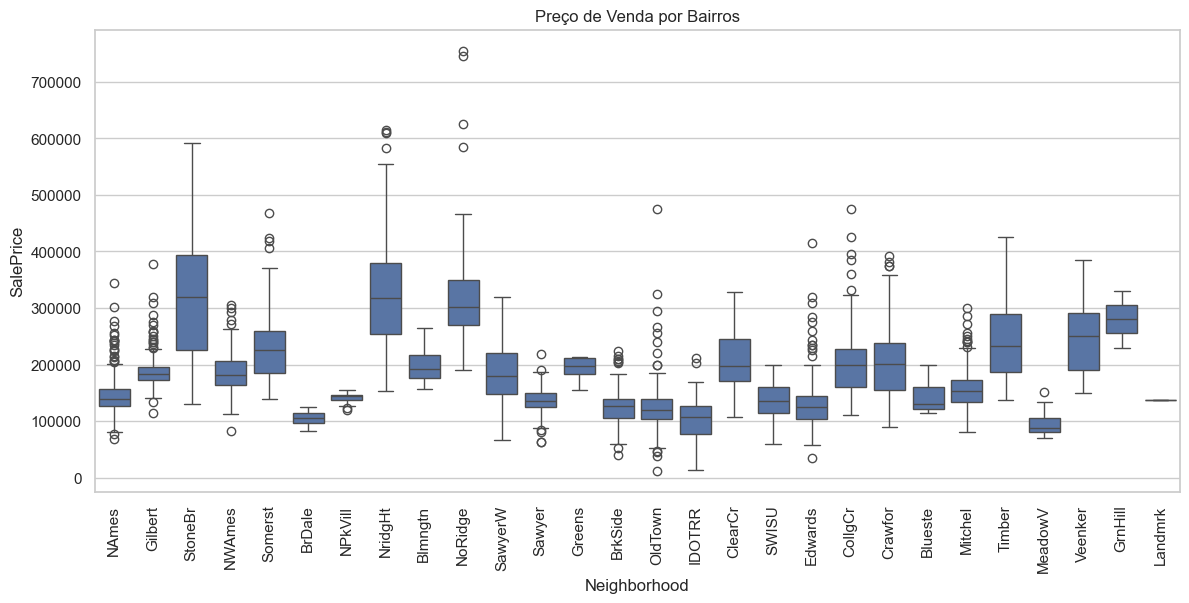

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar o estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico 1: Quantidade de Banheiros x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Full Bath', y='SalePrice', data=df)  
plt.title('Preço de Venda por Quantidade de Banheiros')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Tipo de garagem x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Garage Type', y='SalePrice', data=df)  
plt.title('Preço de Venda por Tipo de Garagem')
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Quantidade de lareiras x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df)  
plt.title('Preço de Venda por Quantidade de Lareiras')
plt.show()

# Gráfico 4: Qualidade da piscina x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Pool QC', y='SalePrice', data=df)  
plt.title('Preço de Venda por Qualidade da Piscina')
plt.show()

# Gráfico 5: Bairro x Preço de venda
plt.figure(figsize=(14, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)  
plt.title('Preço de Venda por Bairros')
plt.xticks(rotation=90)
plt.show()


Bairros como 'NoRidge', 'NridgHt' e 'StoneBr' destacam-se pelos preços mais elevados, evidenciando que a localização é um dos principais fatores de valorização de um imóvel. Além disso, características como número de banheiros (três ou mais) e lareiras têm um impacto significativo no aumento do preço. A qualidade da piscina e a presença de garagens práticas, como os tipos 'BuiltIn' e 'Attchd' (integradas ou anexas à casa), também contribuem para agregar valor ao imóvel.

Por outro lado, fatores que mais desvalorizam os imóveis incluem bairros como 'MeadowV', 'IDOTRR' e 'BrDale', conhecidos por preços mais baixos. Piscinas de qualidade 'TA' (Typical/Average), que além de terem pouco apelo estético ou funcional, podem gerar custos adicionais de manutenção, também impactam negativamente. Por fim, garagens do tipo 'Basement' e 'CarPort' (localizadas no porão ou simples coberturas) são menos atrativas e frequentemente associadas a preços mais baixos.

Agora irei aplicar a ANOVA para cada uma das características: 

In [82]:
from scipy.stats import f_oneway

groups_bedrooms = [df[df['Full Bath'] == value]['SalePrice'] for value in df['Full Bath'].unique()]
# ANOVA
anova_full_bath = f_oneway(*groups_bedrooms)
print(f"Full Bath - F-Statistic: {anova_full_bath.statistic}, p-value: {anova_full_bath.pvalue}")

groups_bedrooms = [df[df['Garage Type'] == value]['SalePrice'] for value in df['Garage Type'].unique()]
# ANOVA
anova_garage_type = f_oneway(*groups_bedrooms)
print(f"Garage Type - F-Statistic: {anova_garage_type.statistic}, p-value: {anova_garage_type.pvalue}")

groups_bedrooms = [df[df['Neighborhood'] == value]['SalePrice'] for value in df['Neighborhood'].unique()]
# ANOVA
anova_neighbourhood = f_oneway(*groups_bedrooms)
print(f"Neighborhood - F-Statistic: {anova_neighbourhood.statistic}, p-value: {anova_neighbourhood.pvalue}")

groups_bedrooms = [df[df['Fireplaces'] == value]['SalePrice'] for value in df['Fireplaces'].unique()]
# ANOVA
anova_fireplaces = f_oneway(*groups_bedrooms)
print(f"Fireplaces - F-Statistic: {anova_fireplaces.statistic}, p-value: {anova_fireplaces.pvalue}")

groups_bedrooms = [df[df['Pool QC'] == value]['SalePrice'] for value in df['Pool QC'].unique()]
# ANOVA
anova_pool_qc = f_oneway(*groups_bedrooms)
print(f"Pool QC - F-Statistic: {anova_pool_qc.statistic}, p-value: {anova_pool_qc.pvalue}")


Full Bath - F-Statistic: 332.5261408212701, p-value: 3.880472602547531e-236
Garage Type - F-Statistic: 161.3697899971011, p-value: 1.6659846883164266e-177
Neighborhood - F-Statistic: 144.3950774998116, p-value: 0.0
Fireplaces - F-Statistic: 232.3633215351391, p-value: 1.93686978907404e-173
Pool QC - F-Statistic: 14.384048232105673, p-value: 1.2389232466266184e-11


O resultado acima mostra que existe uma diferença significativa nos preços médios das propriedades de acordo com cada uma das variáveis escolhidas, porém as com maior F-Statistic (banheiro completo/Full Bath e quantidade de lateiras/Fireplaces) têm um impacto mais forte nas diferenças de preço/SalePrice. 

#### b) Validação dos Pressupostos da ANOVA:

Os três principais pressupostos da ANOVA são:

1. Normalidade dos resíduos: Os dados em cada grupo devem seguir uma distribuição normal.
2. Homocedasticidade (variância homogênea): Os grupos devem ter variâncias semelhantes.
3. Independência dos erros: Os dados de cada grupo devem ser independentes entre si.

**1. Normalidade dos resíduos**

Pode ser usado o teste de Shapiro-Wilk ou Kolmogrov-Sirnov para verificar a normalidade, ou histogramas e gráficos Q-Q para análise visual. Irei utilizar o método Shapiro-Wilk por ser uma das abordagens mais comuns e eficazes para tratar dados com tamanhos pequenos a moderados. 

In [79]:
from scipy.stats import shapiro, levene

# Verificar normalidade dos resíduos de Full Bath
residuals_full_bath = df.groupby('Full Bath')['SalePrice'].apply(lambda x: x - x.mean()).values
shapiro_test = shapiro(residuals_full_bath)
print(f"Shapiro-Wilk para Full Bath - W-Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

# Verificar normalidade dos resíduos para Garage Type
residuals_garage_type = df.groupby('Garage Type')['SalePrice'].apply(lambda x: x - x.mean()).values
shapiro_test_garage_type = shapiro(residuals_garage_type)
print(f"Shapiro-Wilk para Garage Type - W-Statistic: {shapiro_test_garage_type.statistic}, p-value: {shapiro_test_garage_type.pvalue}")

# Verificar normalidade dos resíduos para Neighborhood
residuals_neighborhood = df.groupby('Neighborhood')['SalePrice'].apply(lambda x: x - x.mean()).values
shapiro_test_neighborhood = shapiro(residuals_neighborhood)
print(f"Shapiro-Wilk para Neighborhood - W-Statistic: {shapiro_test_neighborhood.statistic}, p-value: {shapiro_test_neighborhood.pvalue}")

# Verificar normalidade dos resíduos para Fireplaces
residuals_fireplaces = df.groupby('Fireplaces')['SalePrice'].apply(lambda x: x - x.mean()).values
shapiro_test_fireplaces = shapiro(residuals_fireplaces)
print(f"Shapiro-Wilk para Fireplaces - W-Statistic: {shapiro_test_fireplaces.statistic}, p-value: {shapiro_test_fireplaces.pvalue}")

# Verificar normalidade dos resíduos para Pool QC
residuals_pool_qc = df.groupby('Pool QC')['SalePrice'].apply(lambda x: x - x.mean()).values
shapiro_test_pool_qc = shapiro(residuals_pool_qc)
print(f"Shapiro-Wilk para Pool QC - W-Statistic: {shapiro_test_pool_qc.statistic}, p-value: {shapiro_test_pool_qc.pvalue}")


Shapiro-Wilk para Full Bath - W-Statistic: 0.8929760341670956, p-value: 3.848232814110569e-41
Shapiro-Wilk para Garage Type - W-Statistic: 0.8763810846978498, p-value: 2.4174092116724446e-43
Shapiro-Wilk para Neighborhood - W-Statistic: 0.9017625082495918, p-value: 7.3371530509199734e-40
Shapiro-Wilk para Fireplaces - W-Statistic: 0.9071217879898419, p-value: 4.9261850377375867e-39
Shapiro-Wilk para Pool QC - W-Statistic: 0.8849642334301104, p-value: 3.090371005074506e-42


Como todos os valores de p-value são menores que 0.05, rejeitamos a hipótese nula. Os resíduos não seguem uma distribuição normal.

**2. Homocedasticidade (variância homogênea)**

Podemos usar o teste de Levene quando não há certeza de que os dados seguem uma distribuição normal ou Bartlett quando todos os grupos seguem uma distribuição normal. No meu caso, irei utilizar Levene, pois já vimos que nenhuma característica segue uma distribuição normal. 

In [83]:
from scipy.stats import levene

# Homocedasticidade para Full Bath
groups_full_bath = [df[df['Full Bath'] == value]['SalePrice'] for value in df['Full Bath'].unique()]
levene_test = levene(*groups_full_bath)
print(f"Teste de Levene para Full Bath - W-Statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

# Homocedasticidade para Garage Type
groups_garage_type = [df[df['Garage Type'] == value]['SalePrice'] for value in df['Garage Type'].unique()]
levene_test_garage_type = levene(*groups_garage_type)
print(f"Teste de Levene para Garage Type - W-Statistic: {levene_test_garage_type.statistic}, p-value: {levene_test_garage_type.pvalue}")

# Homocedasticidade para Neighborhood
groups_neighborhood = [df[df['Neighborhood'] == value]['SalePrice'] for value in df['Neighborhood'].unique()]
levene_test_neighborhood = levene(*groups_neighborhood)
print(f"Teste de Levene para Neighborhood - W-Statistic: {levene_test_neighborhood.statistic}, p-value: {levene_test_neighborhood.pvalue}")

# Homocedasticidade para Fireplaces
groups_fireplaces = [df[df['Fireplaces'] == value]['SalePrice'] for value in df['Fireplaces'].unique()]
levene_test_fireplaces = levene(*groups_fireplaces)
print(f"Teste de Levene para Fireplaces - W-Statistic: {levene_test_fireplaces.statistic}, p-value: {levene_test_fireplaces.pvalue}")

# Homocedasticidade para Pool QC
groups_pool_qc = [df[df['Pool QC'] == value]['SalePrice'] for value in df['Pool QC'].unique()]
levene_test_pool_qc = levene(*groups_pool_qc)
print(f"Teste de Levene para Pool QC - W-Statistic: {levene_test_pool_qc.statistic}, p-value: {levene_test_pool_qc.pvalue}")


Teste de Levene para Full Bath - W-Statistic: 86.53856943863667, p-value: 1.4167552193579392e-69
Teste de Levene para Garage Type - W-Statistic: 43.030275824204665, p-value: 1.350895532266622e-50
Teste de Levene para Neighborhood - W-Statistic: 25.224949004990727, p-value: 2.915202579904952e-112
Teste de Levene para Fireplaces - W-Statistic: 74.17703542156437, p-value: 5.828777279274862e-60
Teste de Levene para Pool QC - W-Statistic: 6.293182504352751, p-value: 4.86244763790301e-05


Novamente, todos os p-values são menores que 0.05, indicando que rejeitamos a hipótese nula de homocedasticidade. Portanto, as variâncias não são homogêneas entre os grupos para todas as variáveis analisadas.

**3. Independência dos erros:**

O principal método prático é plotar os resíduos em função dos valores ajustados ou em função de uma variável temporal/sequencial, se disponível. Um padrão no gráfico indicaria correlação ou dependência entre os resíduos. Tem também o teste estatístico. Aplicando o Durbin-Watson Test, verifica-se a autocorrelação nos resíduos (especialmente útil para dados temporais ou sequenciais).


In [92]:
# Calculando os resíduos 
df['Residuals_FullBath'] = df.groupby('Full Bath')['SalePrice'].transform(lambda x: x - x.mean())
df['Residuals_GarageType'] = df.groupby('Garage Type')['SalePrice'].transform(lambda x: x - x.mean())
df['Residuals_Neighborhood'] = df.groupby('Neighborhood')['SalePrice'].transform(lambda x: x - x.mean())
df['Residuals_Fireplaces'] = df.groupby('Fireplaces')['SalePrice'].transform(lambda x: x - x.mean())
df['Residuals_PoolQC'] = df.groupby('Pool QC')['SalePrice'].transform(lambda x: x - x.mean())


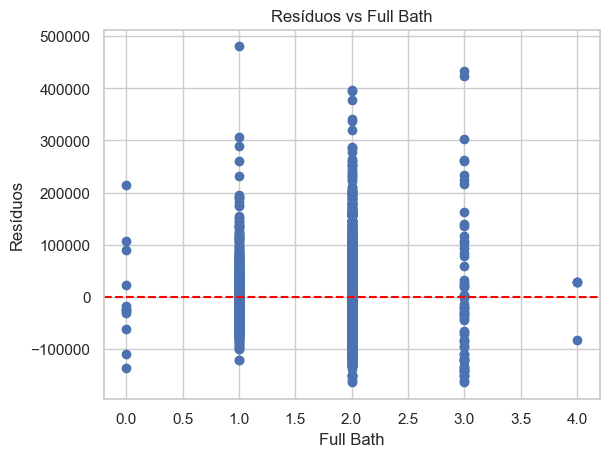

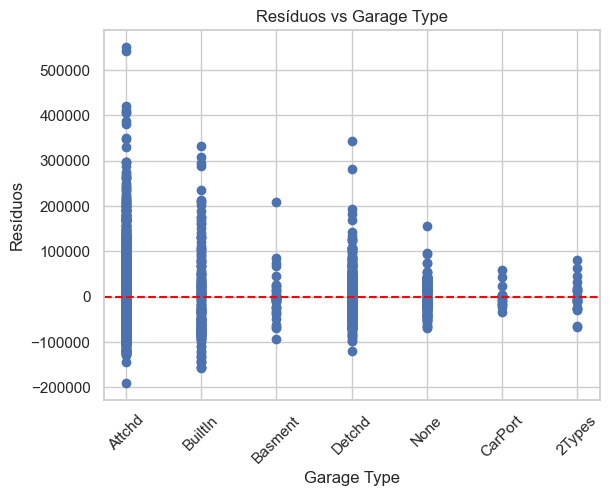

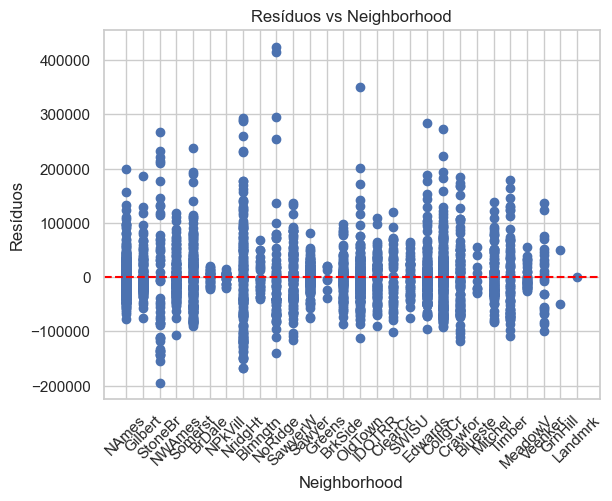

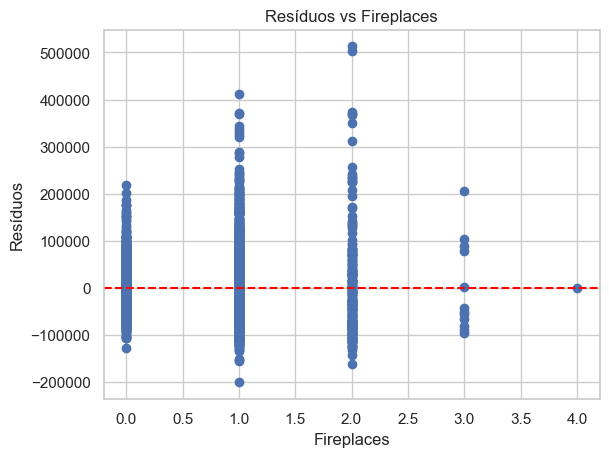

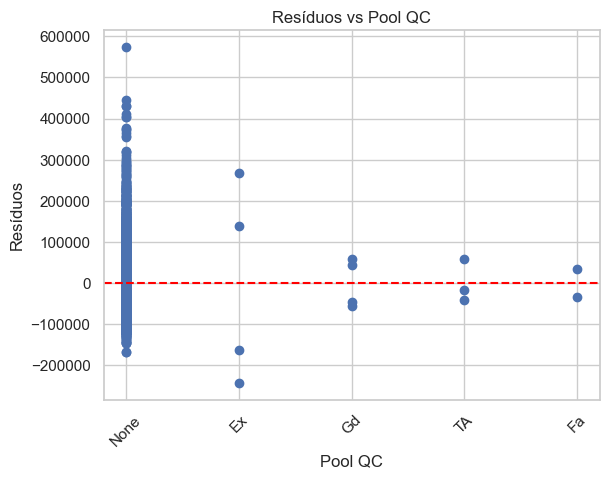

In [93]:
import matplotlib.pyplot as plt

# Plotar resíduos para verificar padrão (Full Bath)
plt.scatter(df['Full Bath'], df['Residuals_FullBath'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Full Bath')
plt.xlabel('Full Bath')
plt.ylabel('Resíduos')
plt.show()

# Plotar resíduos para Garage Type
plt.scatter(df['Garage Type'], df['Residuals_GarageType'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Garage Type')
plt.xlabel('Garage Type')
plt.ylabel('Resíduos')
plt.xticks(rotation=45)  # Rotacionar labels se necessário
plt.show()

# Plotar resíduos para Neighborhood
plt.scatter(df['Neighborhood'], df['Residuals_Neighborhood'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Resíduos')
plt.xticks(rotation=45)  # Rotacionar labels se necessário
plt.show()

# Plotar resíduos para Fireplaces
plt.scatter(df['Fireplaces'], df['Residuals_Fireplaces'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Fireplaces')
plt.xlabel('Fireplaces')
plt.ylabel('Resíduos')
plt.show()

# Plotar resíduos para Pool QC
plt.scatter(df['Pool QC'], df['Residuals_PoolQC'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Pool QC')
plt.xlabel('Pool QC')
plt.ylabel('Resíduos')
plt.xticks(rotation=45)  # Rotacionar labels se necessário
plt.show()



In [94]:
from statsmodels.stats.stattools import durbin_watson

# Teste de Durbin-Watson
dw_test = durbin_watson(df['Residuals_FullBath'])
print(f"Durbin-Watson Test para Full Bath: {dw_test}")
dw_test_garage_type = durbin_watson(df['Residuals_GarageType'])
print(f"Durbin-Watson Test para Garage Type: {dw_test_garage_type}")
dw_test_neighborhood = durbin_watson(df['Residuals_Neighborhood'])
print(f"Durbin-Watson Test para Neighborhood: {dw_test_neighborhood}")
dw_test_fireplaces = durbin_watson(df['Residuals_Fireplaces'])
print(f"Durbin-Watson Test para Fireplaces: {dw_test_fireplaces}")
dw_test_pool_qc = durbin_watson(df['Residuals_PoolQC'])
print(f"Durbin-Watson Test para Pool QC: {dw_test_pool_qc}")


Durbin-Watson Test para Full Bath: 1.1061946462367016
Durbin-Watson Test para Garage Type: 1.0635972238529605
Durbin-Watson Test para Neighborhood: 1.4454914914968147
Durbin-Watson Test para Fireplaces: 0.9511049977496268
Durbin-Watson Test para Pool QC: 0.7072555470882667


Dado que os pressupostos indicam autocorrelação, heterocedasticidade, e ausência de normalidade, o melhor método alternativo seria aquele que lida com essas três violações simultaneamente. Dito isso, a seguir, usarei o modelo linear misto, que considera tanto efeitos fixos (variáveis preditoras principais) quanto efeitos aleatórios (agrupamentos que capturam correlações nos dados).

### Modelos Lineares Mistos

Para analisar os fatores que influenciam o preço de venda de propriedades, foi ajustado um Modelo Linear Misto (MLM) considerando variáveis fixas e um efeito aleatório. O objetivo é avaliar a relação entre características das propriedades e seus preços, enquanto controlávamos a variabilidade entre os bairros.

In [15]:
# Importando as bibliotecas necessárias
import pandas as pd 
import os 
import statsmodels.api as smf 

# Carregando o dataset
# Localiza o arquivo CSV principal
csv_file = os.path.join(new_dir, "AmesHousing.csv")

# Carrega o arquivo diretamente no Pandas
df = pd.read_csv(csv_file)

# Veririficar as primeiras linhas
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

Estrutura do Modelo
- Variável dependente (target): SalePrice (preço de venda).
- Variáveis fixas (preditoras):
    - FullBath (banheiros completos).
    - GarageType (tipo de garagem).
    - Fireplaces (número de lareiras).
    - PoolQC (qualidade da piscina).
- Variável de agrupamento (efeito aleatório): Neighborhood (bairro), para capturar variações nos preços entre os bairros.

In [23]:
# Renomeando colunas com espaços
df.rename(columns={
    'Full Bath': 'FullBath',
    'Garage Type': 'GarageType',
    'Pool QC': 'PoolQC'
}, inplace=True)

In [24]:
import statsmodels.formula.api as smf

# Criando o modelo linear misto com os nomes ajustados
model = smf.mixedlm(
    formula="SalePrice ~ FullBath + C(GarageType) + Fireplaces + C(PoolQC)",  # Variáveis fixas
    data=df,
    groups=df["Neighborhood"]  # Efeito aleatório
)

# Ajustando o modelo
result = model.fit()

# Exibir o resumo dos resultados
print(result.summary())

                        Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         SalePrice      
No. Observations:          2930            Method:                     REML           
No. Groups:                28              Scale:                      1969799541.4854
Min. group size:           1               Log-Likelihood:             -35434.9462    
Max. group size:           443             Converged:                  Yes            
Mean group size:           104.6                                                      
--------------------------------------------------------------------------------------
                             Coef.       Std.Err.   z    P>|z|    [0.025      0.975]  
--------------------------------------------------------------------------------------
Intercept                    311791.248 26196.448 11.902 0.000  260447.154  363135.342
C(GarageType)[T.Attchd]       14458.810  9489.959  1.524 0.128   -41

Principais Resultados

1. Impacto das Variáveis Fixas:

- Banheiros Completos (FullBath):
Cada banheiro completo adicional aumenta o preço médio em R$ 32,633.46.
Resultado estatisticamente significativo (p-value < 0.001).
- Lareiras (Fireplaces):
Cada lareira adicional aumenta o preço médio em R$ 39,230.67.
Resultado estatisticamente significativo (p-value < 0.001).
- Tipo de Garagem (GarageType):
Garagens embutidas (BuiltIn) aumentam o preço médio em R$ 24,449.29, comparadas às garagens anexas.
Alguns tipos de garagem, como Basement e CarPort, não apresentaram impacto estatisticamente significativo.
- Qualidade da Piscina (PoolQC):
A presença de piscina está associada a uma redução no preço médio, independentemente da qualidade. Por exemplo:
Piscinas de qualidade Fair reduzem o preço médio em R$ 201,198.21.
Todos os níveis foram estatisticamente significativos (p-value < 0.05).

2. Efeito Aleatório (Bairros):

    A variância associada ao efeito aleatório dos bairros foi de 22,832,9246.83, indicando que as diferenças de preço entre os bairros têm um impacto relevante no modelo.

Conclusão

As variáveis FullBath, Fireplaces, e alguns níveis de GarageType são fatores significativos que aumentam o preço médio das propriedades. Surpreendentemente, a presença de piscinas está associada a uma redução no preço, o que pode refletir preferências específicas do mercado imobiliário local. O efeito aleatório mostra que o bairro desempenha um papel importante na variação do preço das propriedades.